In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
m = 2
Npoints = 1000
X = np.random.randn(Npoints*m).reshape(Npoints,m)
theta = np.random.rand(m+1)
print(f"True theta : {theta}")
yTrue = X.dot(theta[:m])+theta[m]
noiseAmp = 2
yNoisy = yTrue+noiseAmp*np.random.randn(Npoints)
print(f"X.shape: {X.shape}")
print(f"theta.shape: {theta.shape}")
print(f"yTrue.shape: {yTrue.shape}")
print(f"yNoisy.shape:{yNoisy.shape}")

Xtest = np.concatenate((np.ones((Npoints,1)),X),axis=1)
Xtest = Xtest.T
print(Xtest.shape)

True theta : [0.88971132 0.05193854 0.6667153 ]
X.shape: (1000, 2)
theta.shape: (3,)
yTrue.shape: (1000,)
yNoisy.shape:(1000,)
(3, 1000)


In [3]:
def computeGradientGeneralized(X,y,y_estimate):
    '''Computes the gradient for the Quadratic loss function. X is a (1+m)xn augmented numPy array with n observations and m features
       X = [1 | X_input].T
       delta_y = y-y_estimate , is an nx1 numPy array of the error in estimate at the current iteration.
       returns the (1+m)x1 gradient at the current iteration
    '''
    n = X.shape[1]
    delta_y = (y-y_estimate)    
    return -(2/n)*X.dot(delta_y)

In [4]:
def GradientDescentGeneralized(X,y,start,step_size,tolerance,Niter):    
    ''' Will perform gradient descent on X (nxm), using target y (nx1) 
    '''
    X = np.concatenate((np.ones((Npoints,1)),X),axis=1)
    X = X.T    
    print(f"X.shape = {X.shape}")
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]            
    while i<Niter and gradNorm > tolerance:                
        y_estimate = current_theta_estimate.dot(X)
        grad = computeGradientGeneralized(X,y,y_estimate)
        gradNorm = np.sqrt((grad.T).dot(grad))
        norms.append(gradNorm)        
        current_theta_estimate = current_theta_estimate - step_size*grad
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Iterations')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [5]:
def VanillaLinearRegressionGeneralized(X,y):    
    '''Assumes that the input matrix is an nx1 numPy array with n observations and y is an nx1 target vector 
    '''
    n,m = X.shape
    print(f"(n,m)=({n},{m})")
    theta_eatimate_start = np.random.rand(m+1)
    print(f"theta_estimate_start: {theta_eatimate_start}")
    learning_rate = 1e-1
    err_tolerance = 1e-6
    MaxIter = 50000
    estimated_coeff = GradientDescentGeneralized(X,y,theta_eatimate_start,learning_rate,err_tolerance,MaxIter)
    return estimated_coeff

    
    
    


    
    
    

(n,m)=(1000,2)
theta_estimate_start: [0.65370528 0.70731529 0.36034643]
X.shape = (3, 1000)
Started at location [0.65370528 0.70731529 0.36034643]
Finished with 65 iterations
Finished with gradient norm = 9.807572611845027e-07
Finished at location [0.61444751 0.76669669 0.01412282]


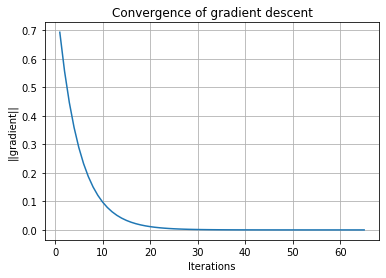

In [9]:
theta_est = VanillaLinearRegressionGeneralized(X,yNoisy)

In [10]:
theta_est

array([0.61444751, 0.76669669, 0.01412282])

In [11]:
y_pred = X.dot(theta_est[:m])+theta_est[m]
rmse_original = np.sqrt(((yTrue-yNoisy).T).dot(yTrue-yNoisy)/Npoints)
rmse_pred = np.sqrt(((yNoisy-y_pred).T).dot(yNoisy-y_pred)/Npoints)
print(f'Performance: RMSE_start: {rmse_original}, RMSE_model: {rmse_pred}')


Performance: RMSE_start: 1.9583195479394473, RMSE_model: 2.177504859184213


In [12]:
linReg = LinearRegression()
linReg.fit(X,yNoisy)
theta_skl = np.concatenate((np.array([linReg.intercept_]),linReg.coef_))
print(theta_skl)

[0.61444755 0.76669653 0.01412242]
